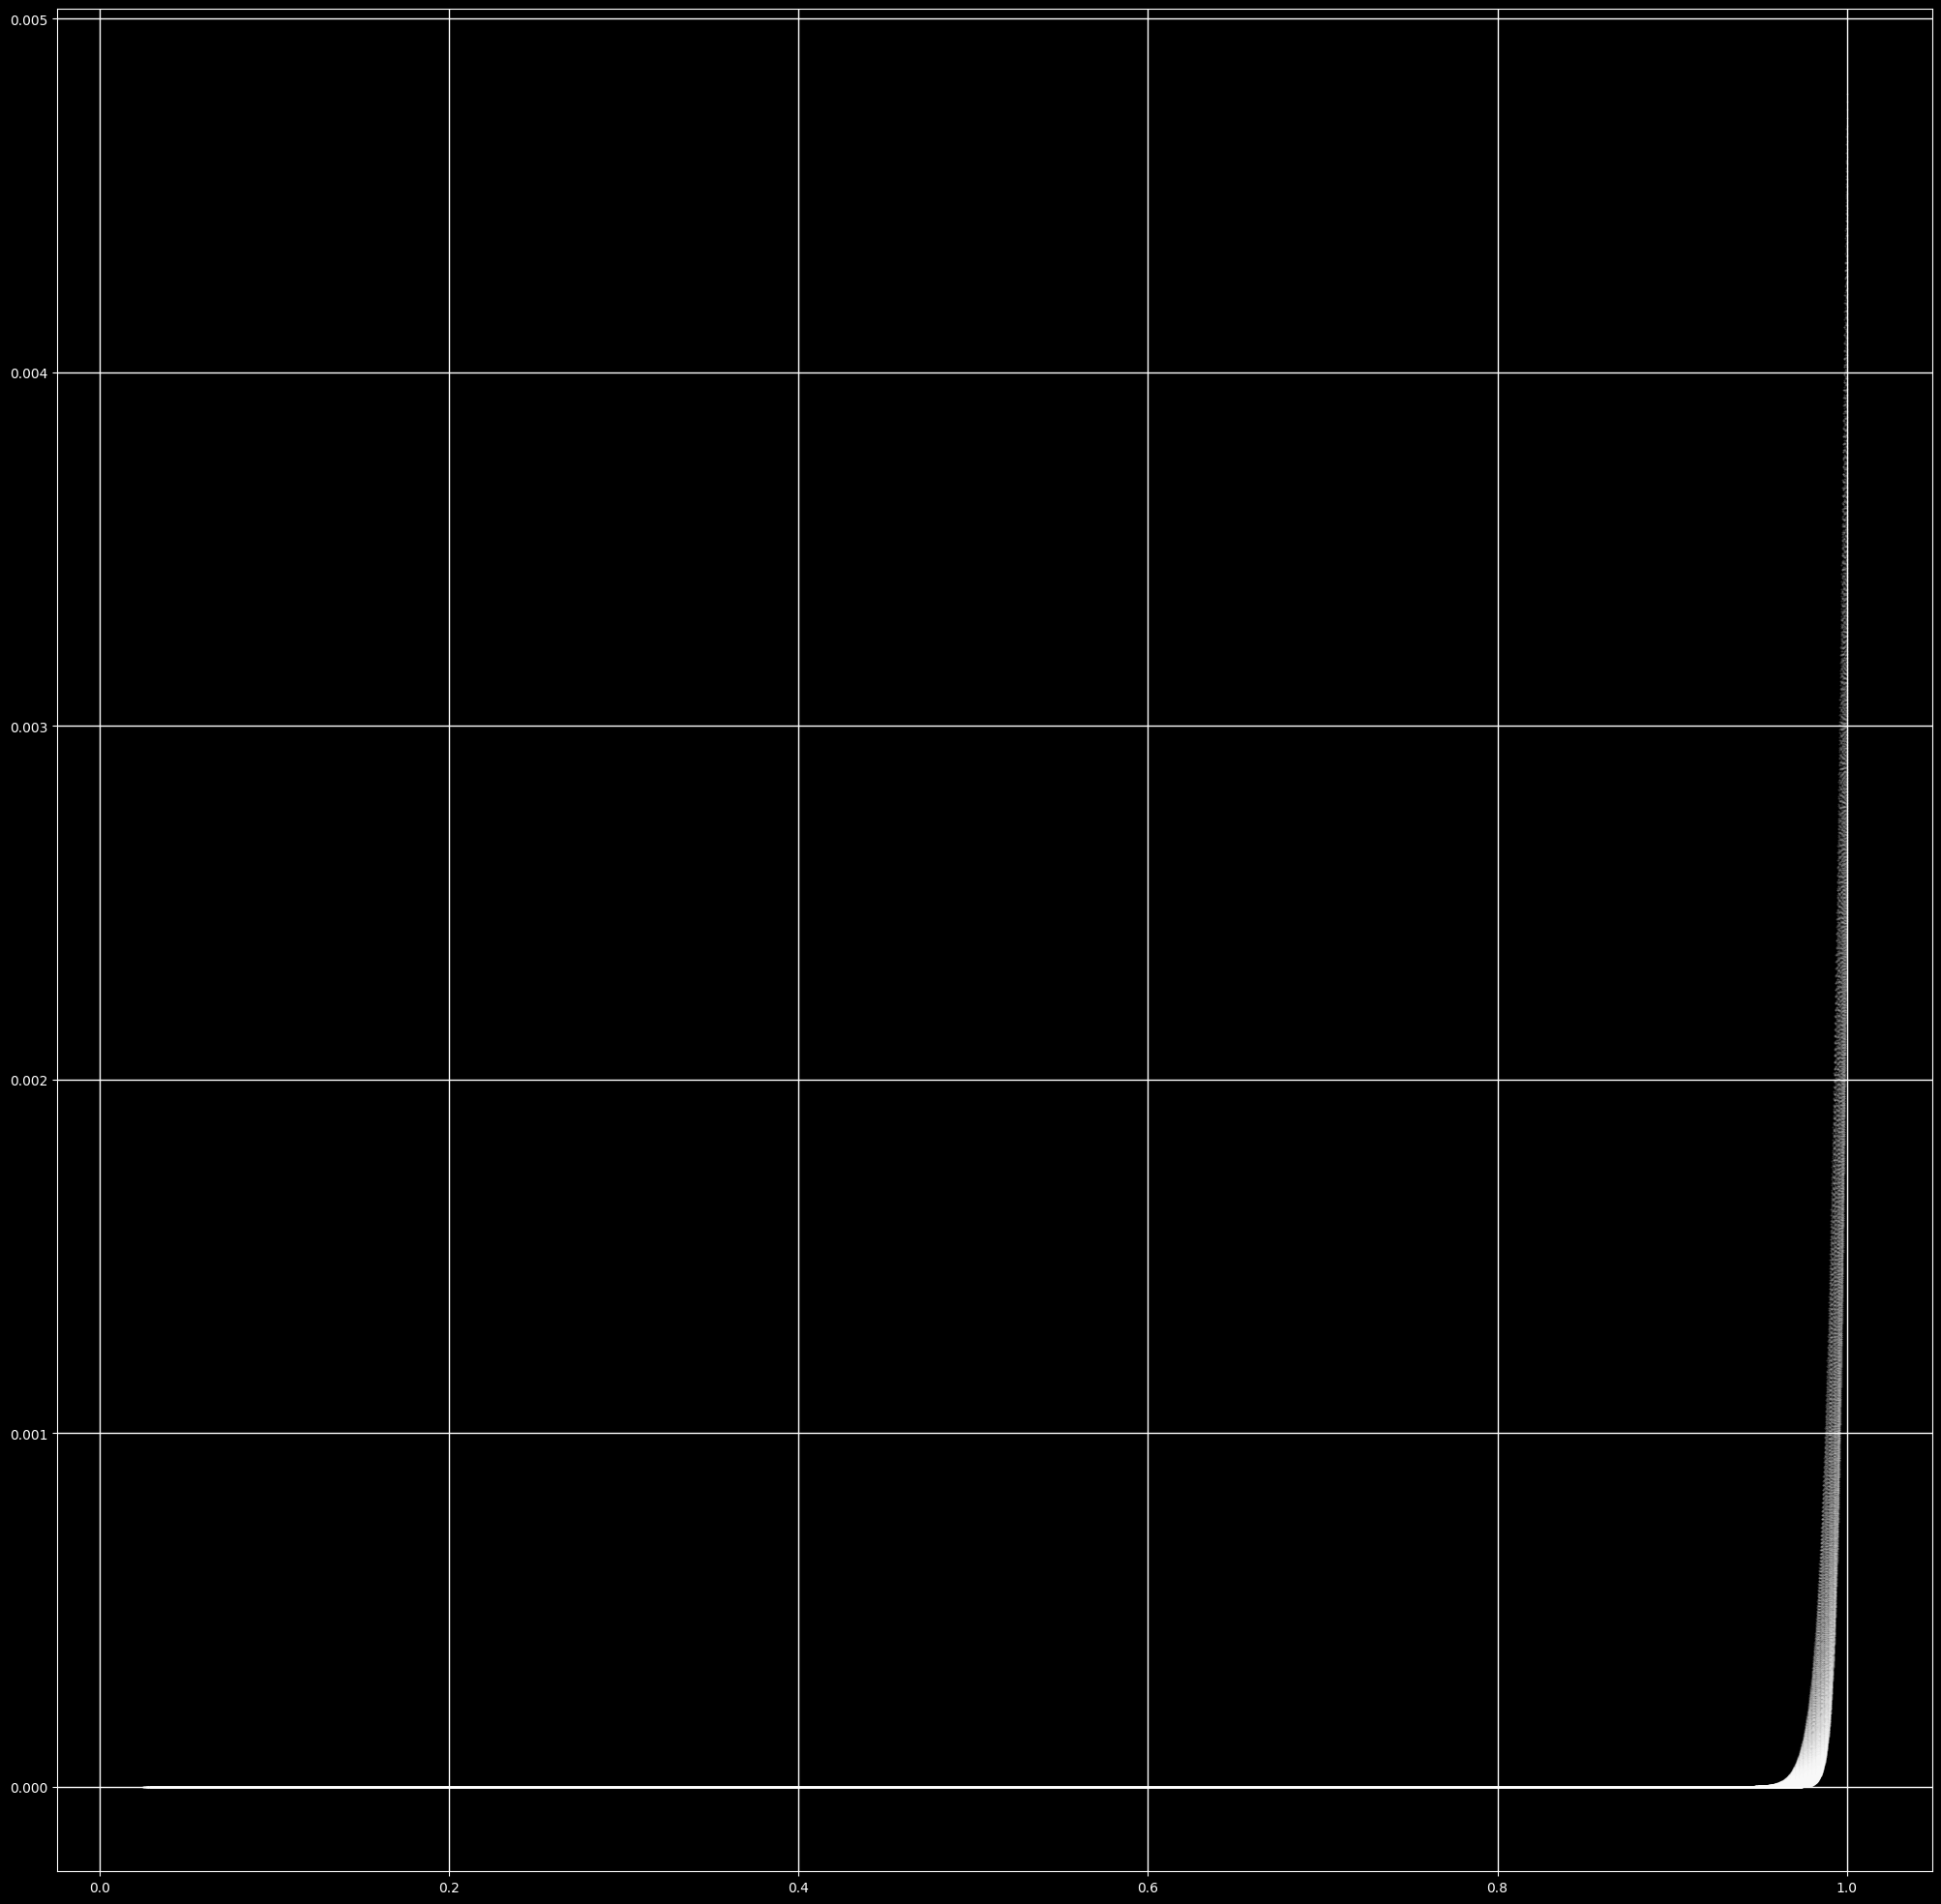

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def update(x, r):
    return r*x*(1-x)
    # return (2*x) % 1
    # return x**3 - r*x

def get_data(rs, samples, subsamples):
    """генерирует данные для визуализации"""
    r_count = len(rs)
    data = np.empty([r_count, subsamples])
    for i, r in enumerate(rs):
        x = 0.2
        for t in range(samples - subsamples):
            x = update(x, r)
        for t in range(subsamples):
            data[i, t] = x
            x = update(x, r)
    return data

left, right =0, 1.0
bottom, top = 0., 1.0
subsamples = 200 * 1
samples = subsamples + 200

rs = np.linspace(left, right, 5000)
data = get_data(rs, samples, subsamples)

plt.style.use('dark_background')
plt.figure(figsize=(25, 25))
for i, r in enumerate(rs):
    values = data[i]
    values = values[(values > bottom) & (values < top)]
    r_samples = np.full_like(values, r)
    plt.plot(r_samples, values, 'w.', markersize=1, alpha=.2)

Можно заметить, что интервал между последующими бифуркациями сокращается с ростом $r$. И каждый последующий интервал между бифуркациями меньше предыдущего в 4.669... раз. Это постоянная Фейгенбаума, и она проявляется не только в Logistic Map, но и в любых других уравнениях с единственным максимумом на диаграмме $x_t(x_{t-1})$. Этот каскад удвоения периода в конечном счете сходится к бесконечному периоду примерно около $r\approx 3.57$ (для Logistic Map). Дальше начинается **хаос**. На этом мистическом режиме система теряет всякую конечную периодичность и ее поведение выглядит совершенно хаотичным. Рассмотрим хаотическое поведение системы при $r=3.67$. 

0.9174998061901662

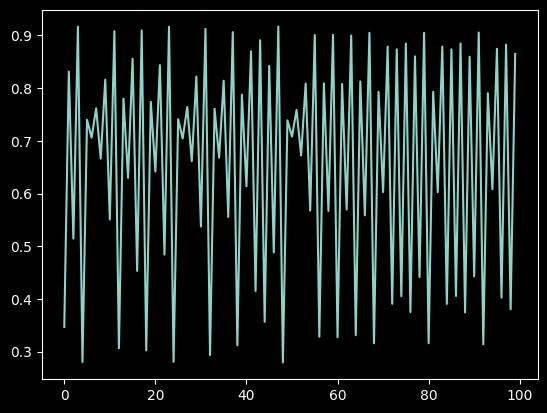

In [13]:
def update(x, r=3.67):
    return r*x * (1 - x)

x = 0.15
history = [x]

for i in range(1000):
    x = update(x)
    history.append(x)

plt.plot(history[-100:])
# plt.plot(history[:100])
max(history)

### Lorentz Attractor

$\mathbf r = (x, y, z)$, $\mathbf v = (\dot x, \dot y, \dot z)$, $\mathbf p = (\sigma, \rho, \beta)$
$$
\begin{aligned}
& \frac{dx}{dt} = \sigma (y-x) \\
& \frac{dy}{dt} = x(\rho - z) - y \\
& \frac{dz}{dt} = xy - \beta z
\end{aligned}
$$

In [52]:
def update(r, p, dt):
    sigma, rho, beta = p
    x, y, z = r
    r[0] += sigma * (y - x) * dt
    r[1] += (x * (rho - z) - y) * dt
    r[2] += (x*y - beta*z) * dt

iters = 10000
history = np.zeros((iters, 3), dtype=np.float64)
r = np.array([1., 1., 1.])      # начальные значения
p = np.array([10., 28., 8/3])   # параметры системы
dt = 0.01

for i in range(iters):
    history[i] = r
    update(r, p, dt)

xs, ys, zs = history.T

%matplotlib qt
plt.style.use('Solarize_Light2')
ax = plt.figure().add_subplot(projection='3d')
plt.plot(xs, ys, zs)

Text(0.5, 0, 't')

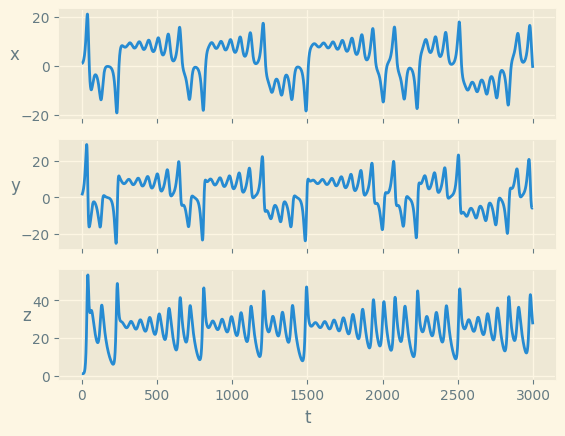

In [76]:
%matplotlib inline
ts = np.array(range(iters))
size = 3000

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(ts[:size], xs[:size])
ax[0].set_ylabel('x', rotation=0)
ax[1].plot(ts[:size], ys[:size])
ax[1].set_ylabel('y', rotation=0)
ax[2].plot(ts[:size], zs[:size])
ax[2].set_ylabel('z', rotation=0)
ax[2].set_xlabel('t')

Поведение системы весьма непредсказуемо, и в то же время наблюдаются некоторые паттерны. Можно заметить, что $x$ и $y$ склонны оставаться некоторое время в положительной области, либо в отрицательной, производя некоторые осцилляции. Время от времени осцилляции перекидываются из одной области в другую в непредсказуемый момент. Так продолжается до бесконечности. В то же время $z$ остается положительным на протяжении всего времени, демонстрируя такие же осцилляции.

На трехмерной визуализации фазового пространства виден аттрактор Лоренца - наиболее известный пример **странных аттракторов** (*strange attractors*), т.е. аттракторы, возникающие в фазовых пространствах хаотических систем.